In [1]:
%matplotlib inline
import torch

import pandas as pd
import matplotlib.pyplot as plt

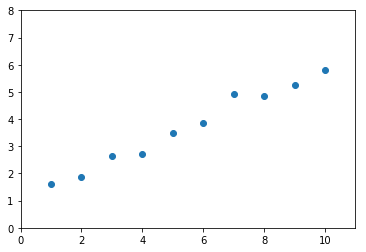

In [2]:
data = pd.read_csv('data.csv')
x = torch.from_numpy(data['x'].values).unsqueeze(dim=1).float()
y = torch.from_numpy(data['y'].values).unsqueeze(dim=1).float()
plt.xlim(0, 11);    plt.ylim(0, 8)
plt.scatter(x, y)
plt.show()

In [3]:
import torch.nn as nn
model = nn.Linear(in_features=1, out_features=1, bias=True)
print(model)
print(model.weight)
print(model.bias)

Linear(in_features=1, out_features=1, bias=True)
Parameter containing:
tensor([[-0.7742]], requires_grad=True)
Parameter containing:
tensor([-0.4185], requires_grad=True)


In [4]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.01)

In [5]:
for step in range(500):
    prediction = model(x)
    loss = criterion(input=prediction, target=y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if step % 20 == 0:
        print(loss.item())
        pass

83.34738159179688
59.645591735839844
40.87042236328125
26.89234161376953
16.98308563232422
10.273117065429688
5.9412150382995605
3.2826309204101562
1.7355338335037231
0.8835024237632751
0.4399719536304474
0.2218984067440033
0.12066040188074112
0.07628059387207031
0.057890281081199646
0.050657592713832855
0.0479220449924469
0.0468866340816021
0.04645314812660217
0.04621858522295952
0.046045199036598206
0.04588916897773743
0.04573780298233032
0.04558776691555977
0.04543840140104294


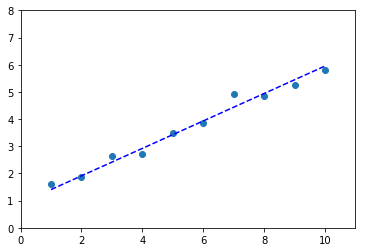

In [6]:
def display_results(model, x, y):
    prediction = model(x)
    loss = criterion(input=prediction, target=y)
    plt.clf()
    plt.xlim(0, 11);    plt.ylim(0, 8)
    plt.scatter(x.data.numpy(), y.data.numpy())
    plt.plot(x.data.numpy(), prediction.data.numpy(), 'b--')
    plt.show()
display_results(model, x, y)

In [7]:
torch.save(obj=model, f='model.pt')
loaded_model = torch.load(f='model.pt')